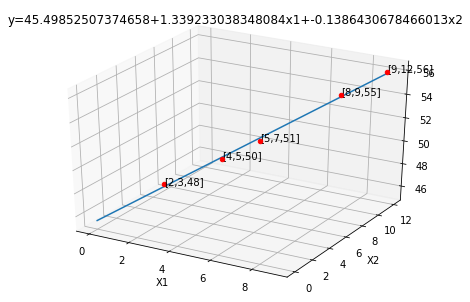

In [4]:

from  matplotlib import pyplot as plt
import  numpy as np
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
fig = plt.figure()
ax = Axes3D(fig)
 
#列出实验数据
point=[[2,3,48],[4,5,50],[5,7,51],[8,9,55],[9,12,56]]
plt.xlabel("X1")
plt.ylabel("X2")
 
#表示矩阵中的值
ISum = 0.0
X1Sum = 0.0
X2Sum = 0.0
X1_2Sum = 0.0
X1X2Sum = 0.0
X2_2Sum = 0.0
YSum = 0.0
X1YSum = 0.0
X2YSum = 0.0
 
#在图中显示各点的位置
for i in range(0,len(point)):
 
    x1i=point[i][0]
    x2i=point[i][1]
    yi=point[i][2]
    ax.scatter(x1i, x2i, yi, color="red")
    show_point = "["+ str(x1i) +","+ str(x2i)+","+str(yi) + "]"
    ax.text(x1i,x2i,yi,show_point)
 
    ISum = ISum+1
    X1Sum = X1Sum+x1i
    X2Sum = X2Sum+x2i
    X1_2Sum = X1_2Sum+x1i**2
    X1X2Sum = X1X2Sum+x1i*x2i
    X2_2Sum = X2_2Sum+x2i**2
    YSum = YSum+yi
    X1YSum = X1YSum+x1i*yi
    X2YSum = X2YSum+x2i*yi
 
# 进行矩阵运算
# _mat1 设为 mat1 的逆矩阵
m1=[[ISum,X1Sum,X2Sum],[X1Sum,X1_2Sum,X1X2Sum],[X2Sum,X1X2Sum,X2_2Sum]]
mat1 = np.matrix(m1)
m2=[[YSum],[X1YSum],[X2YSum]]
mat2 = np.matrix(m2)
_mat1 =mat1.getI()
mat3 = _mat1*mat2
 
# 用list来提取矩阵数据
m3=mat3.tolist()
a0 = m3[0][0]
a1 = m3[1][0]
a2 = m3[2][0]



 
# 绘制回归线
x1 = np.linspace(0,9)
x2 = np.linspace(0,12)
y = a0+a1*x1+a2*x2
ax.plot(x1,x2,y)
show_line = "y="+str(a0)+"+"+str(a1)+"x1"+"+"+str(a2)+"x2"
plt.title(show_line)
plt.show()

In [3]:
plt.show()

In [5]:
import xlrd

In [5]:
import pandas as pd 

In [6]:
df = pd.read_excel("./3d.xlsx")

In [7]:
print(df)

     R1   G1   R2   G2
0     0  255   45  195
1    23  230   36  160
2    26   28    1    3
3    47  207   32  122
4    48   45    5    5
5    52  182   25   90
6    67  163   26   68
7    67   66   11    9
8    83  136   28   45
9    83   80   19   14
10   95   97   28   22
11  106  106   36   25
12  125  115   56   32
13  134  112   73   35
14  141  132   81   45
15  150  144   94   55
16  188   65  154   20
17  192  189  162   96
18  217   36  215   22
19  239  236  255  183
20  255    0  255   33
21  255  255  255  198


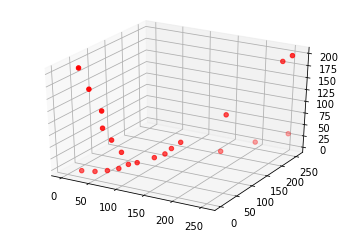

TypeError: Tensor objects are only iterable when eager execution is enabled. To iterate over this tensor use tf.map_fn.

In [13]:
# coding= utf-8
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 参数、迭代阈值
w1 = 2.4
w2 = 8.8
b = 0.5
threshold = 0.00001

# 1.生成数据
# 这里需要强制转换成float32，否则后面在matmul时会提示float32和float64类型不匹配
# 这里的x_data包含x和y坐标
x_coor = df['R1']
y_coor = df['R2']
x_data = np.float32(np.zeros([2, 22]))
x_data[0, :] = df['R1']
x_data[1, :] = df['R2']
y_data = df['G2']

ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(x_coor, y_coor, y_data, c='r', marker='o')

# 显示图像
plt.show()

# 2.定义模型变量
# random_uniform用于返回一个指定大小，数值介于指定范围的矩阵
W = tf.Variable(tf.random_uniform([1, 2], -10, 10))
# 这里b的shape是(1,)，并不是1×1，第二维是任意大小，所以才能在下面和1×100的矩阵相加
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(W, x_data) + b

# 3.定义评价指标
# 采用方差的定义，求取平均方差
loss = tf.reduce_mean(tf.square(y - y_data))

# 4.构造运行图
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# 5.启动图
init = tf.global_variables_initializer()
sess = tf.Session()
# 运行之前必须要先运行这行代码，进行初始化
sess.run(init)

t1 = time.time()

count = 0
while sess.run(loss) > threshold:
    sess.run(train)
    count += 1
    # 注意，直接打印loss并不是它的内容，必须sess.run(loss)打印出来的才是它的数值
    # 因为我们在建立graph的时候，只建立tensor的结构形状信息，并没有执行数据的操作
    print(count, sess.run(loss), sess.run(W), sess.run(b))

t2 = time.time()

print(t2 - t1, "seconds.")

In [2]:
import pandas as pd


def excel_one_line_to_list(i):
    df = pd.read_excel("./3d.xlsx", usecols=[i],names=None)  # 读取项目名称列,不要列名
    df_li = df.values.tolist()
    result = []
    for s_li in df_li:
        result.append(s_li[0])
    return result

r1=[]
g1=[]
r2=[]
g2=[]
if __name__ == '__main__':
    r1=excel_one_line_to_list(0)
    g1=excel_one_line_to_list(1)
    r2=excel_one_line_to_list(2)
    g2=excel_one_line_to_list(3)


In [3]:
r1

[0,
 23,
 26,
 47,
 48,
 52,
 67,
 67,
 83,
 83,
 95,
 106,
 125,
 134,
 141,
 150,
 188,
 192,
 217,
 239,
 255,
 255]

In [4]:
X=[]
for i in range(len(r1)):
    X.append([r1[i],g1[i]])
print(X)
              
Y=[]
for i in range(len(r1)):
    Y.append([r2[i],g2[i]])
print(Y)

[[0, 255], [23, 230], [26, 28], [47, 207], [48, 45], [52, 182], [67, 163], [67, 66], [83, 136], [83, 80], [95, 97], [106, 106], [125, 115], [134, 112], [141, 132], [150, 144], [188, 65], [192, 189], [217, 36], [239, 236], [255, 0], [255, 255]]
[[45, 195], [36, 160], [1, 3], [32, 122], [5, 5], [25, 90], [26, 68], [11, 9], [28, 45], [19, 14], [28, 22], [36, 25], [56, 32], [73, 35], [81, 45], [94, 55], [154, 20], [162, 96], [215, 22], [255, 183], [255, 33], [255, 198]]


In [ ]:
#实验一
# 方法一：use keras to get weight in learning process
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(input_dim=2, units=2))
model.compile(loss='mse', optimizer='adam')

for step in range(20000):
    cost = model.train_on_batch(X, Y)
    if step % 1000 == 0:
        print("After %d trainings, the cost: %f" % (step, cost))

print('\nTesting ------------')
cost = model.evaluate(X, Y, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

Instructions for updating:
Use tf.cast instead.


In [5]:
#最小二乘法线性回归
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,Y)
print(model.score(X,Y))
print('W='+str(model.coef_))
print('b='+str(model.intercept_))

0.8830031325235624
W=[[1.0599391  0.19928519]
 [0.12893578 0.78214318]]
b=[-65.00746051 -50.41457756]


In [14]:
import numpy as np
X=[]
for i in range(len(r1)):
    X.append([r1[i],g1[i]])
X = np.array(X)

Y=[]
for i in range(len(r1)):
    Y.append([r2[i],g2[i]])
Y = np.array(Y)

In [6]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


polynomial = PolynomialFeatures(degree = 3)
X_transformed = polynomial.fit_transform(X)#x每个数据对应的多项式系数

regr = linear_model.LinearRegression()
regr.fit(X_transformed, Y)#训练数据
# regr.fit(X, Y)

Y_hat = regr.predict(X_transformed)

In [9]:
import numpy as np
X=[]
for i in range(len(r1)):
    X.append([r1[i],g1[i]])
X = np.array(X)

Y=[]
for i in range(len(r1)):
    Y.append([r2[i],g2[i]])
Y = np.array(Y)

In [10]:
import numpy as np
x = np.hsplit(X,2)[0]
y = np.hsplit(X,2)[1]
z = np.hsplit(Y_hat,2)[0]
xx,yy = np.meshgrid(x,y)
print(x.shape)
print(y.shape)
print(z.shape)
print(Y_hat.shape)

(22, 1)
(22, 1)
(22, 1)
(22, 2)


In [11]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


polynomial = PolynomialFeatures(degree = 3)
X_transformed = polynomial.fit_transform(X)#x每个数据对应的多项式系数

regr = linear_model.LinearRegression()
regr.fit(X_transformed, Y)#训练数据
# regr.fit(X, Y)

Y_hat = regr.predict(X_transformed)

In [13]:
z_ = regr.predict(polynomial.fit_transform(np.concatenate([xx.reshape(22*22,1),yy.reshape(22*22,1)],axis = 1)))

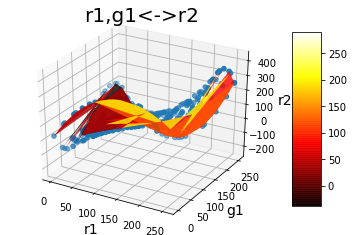

In [15]:
fig = plt.figure()
ax = plt.gca(projection='3d')  # 返回的对象就是导入的axes3d类型对象
plt.title('r1,g1<->r2', fontsize=20)
ax.set_xlabel('r1', fontsize=14)
ax.set_ylabel('g1', fontsize=14)
ax.set_zlabel('r2', fontsize=14)
plt.tick_params(labelsize=10)
ax.scatter(xx,yy,np.hsplit(z_,2)[0],cmap=plt.cm.hot)
surf = ax.plot_surface(xx, yy, np.hsplit(z_,2)[0].reshape(22,22), rstride=10, cstride=10, cmap=plt.cm.hot,alpha=0.8)
fig.colorbar(surf, shrink=0.8, aspect=6)
plt.show()

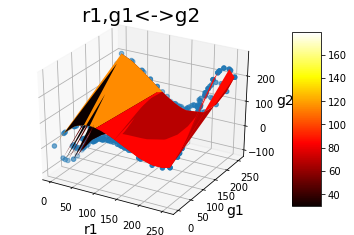

In [19]:
fig = plt.figure()
ax = plt.gca(projection='3d')  # 返回的对象就是导入的axes3d类型对象
plt.title('r1,g1<->g2', fontsize=20)
ax.set_xlabel('r1', fontsize=14)
ax.set_ylabel('g1', fontsize=14)
ax.set_zlabel('g2', fontsize=14)
plt.tick_params(labelsize=10)
ax.scatter(xx,yy,np.hsplit(z_,2)[1],cmap=plt.cm.hot)
surf = ax.plot_surface(xx, yy, np.hsplit(z_,2)[1].reshape(22,22), rstride=10, cstride=10, cmap=plt.cm.hot)
fig.colorbar(surf, shrink=0.8, aspect=6)
plt.show()

In [22]:
def depress(data):
    for i in data:
        for j in range(len(i)):
            if i[j] > 255:
                i[j] = 255
    return data

In [23]:
#实验五
#给定RGB值，预测测得RGB值
import math
from sklearn.model_selection  import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
result = depress(model.predict(X_test))#depress value > 255
print("RMSE:"+str(math.sqrt(np.sum((Y_test-result)**2)/result.size)))

RMSE:20.553004598267556
